In [6]:
#From the book

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
import tarfile
from six.moves import urllib

df = pd.read_csv('housing.csv', encoding='latin-1')


In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
#The  total_bedrooms columns has null values (many missing districts)
#All the attributes are float except the ocean_promimity
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

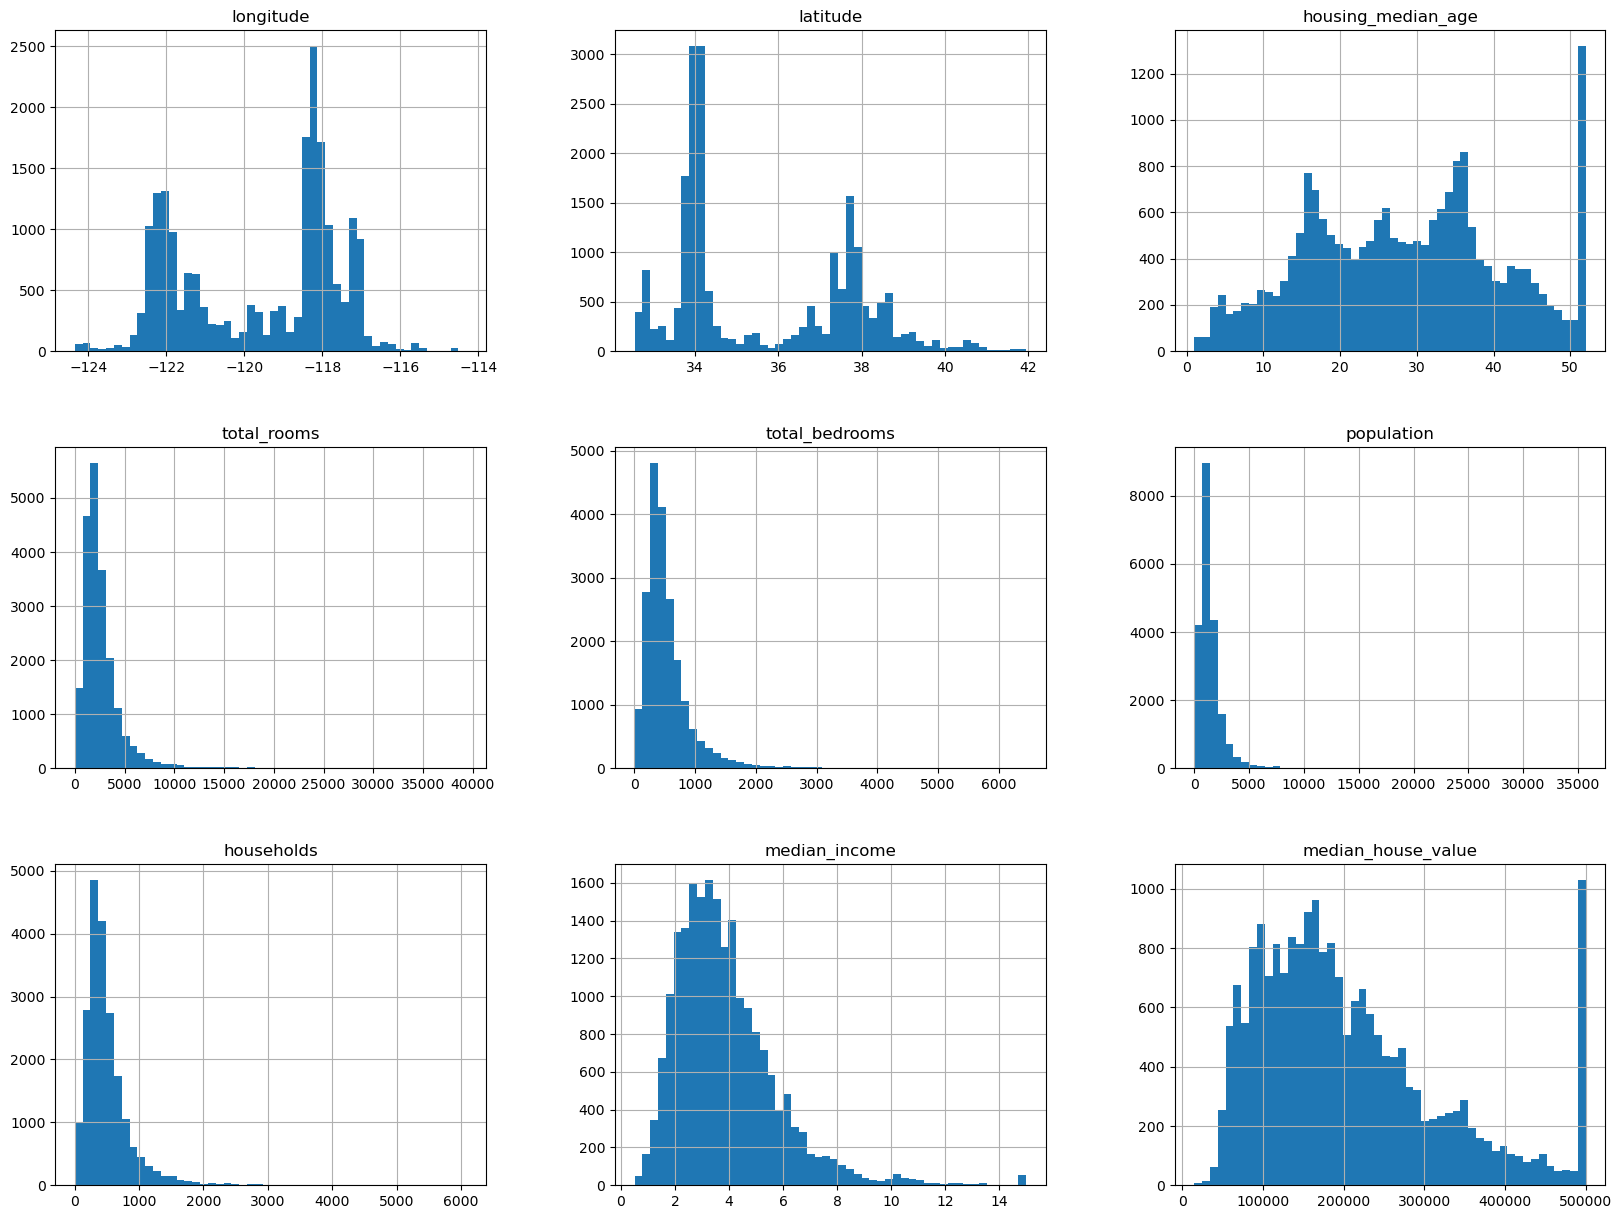

In [13]:
df.hist(bins=50, figsize=(20,15))



<Axes: >

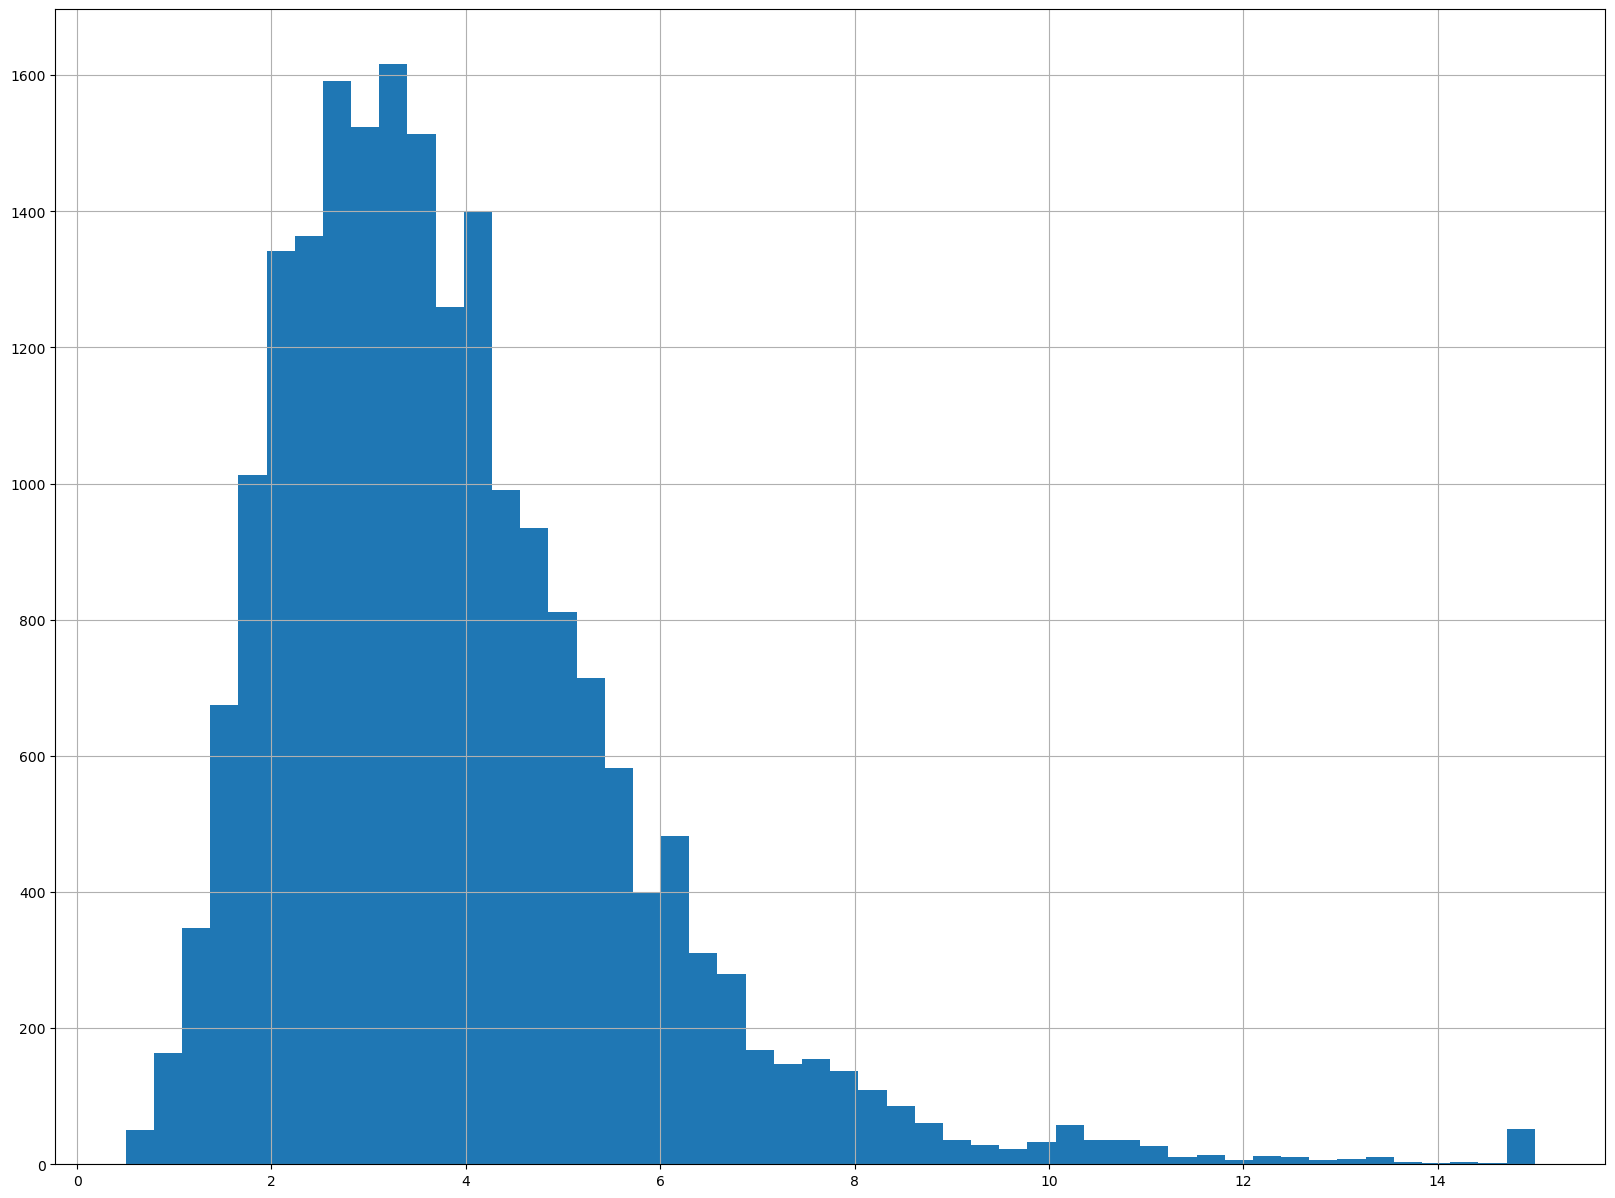

In [14]:
df['median_income'].hist(bins=50, figsize=(20,15))


<Axes: >

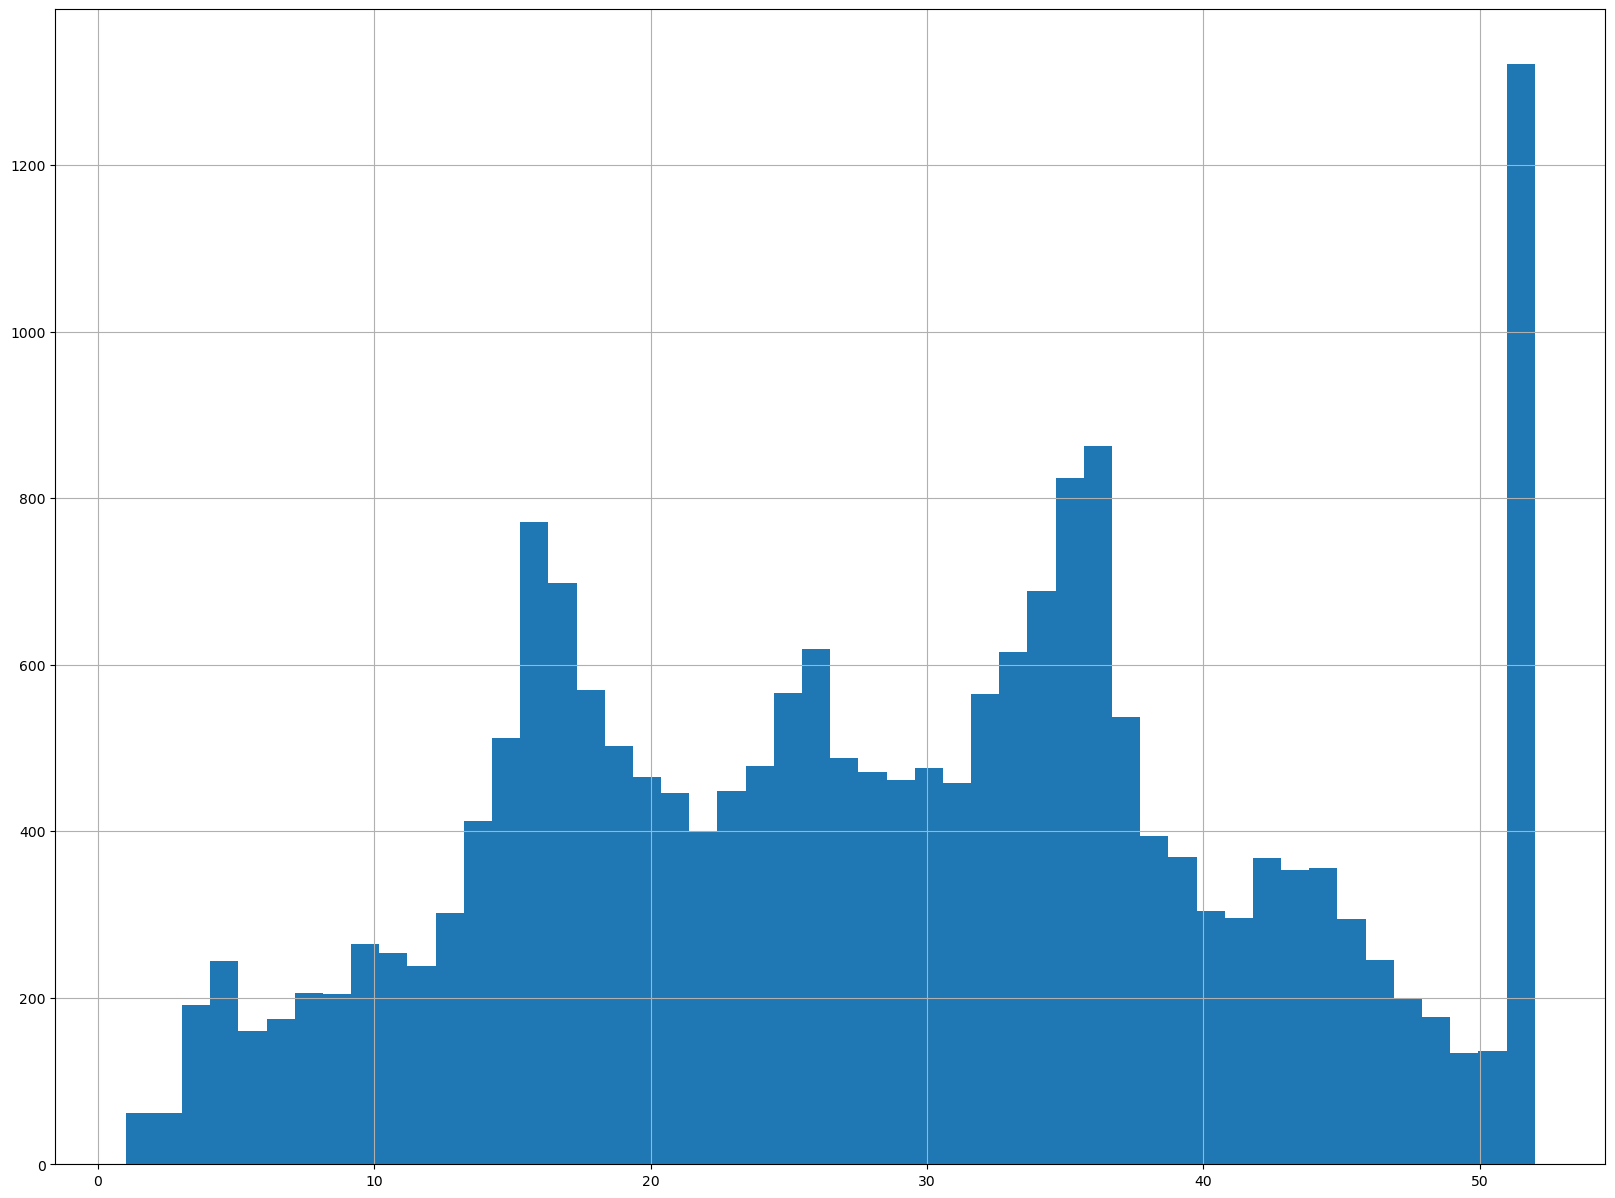

In [15]:
df['housing_median_age'].hist(bins=50, figsize=(20,15))


In [16]:
#Create a data test 
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]
#You can then use this function like this:
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set), "train +", len(test_set), "test")



16512 train + 4128 test


In [17]:
test_set.to_csv('test_set.csv', index=False)

<Axes: xlabel='longitude', ylabel='latitude'>

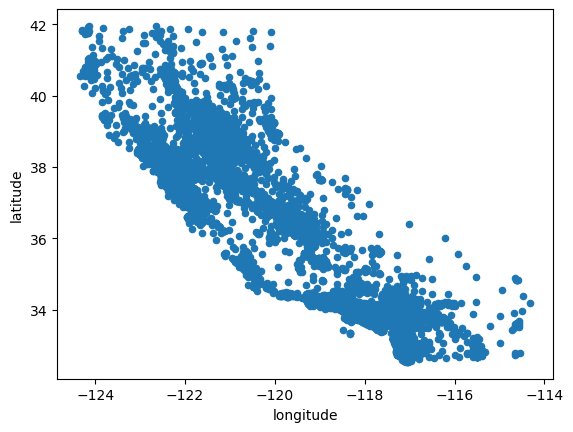

In [18]:
df.plot(kind='scatter', x='longitude', y='latitude')

# Plotting high density areas
#Use of alpha- "alpha parameter controls the transparency of points in a scatterplot. It takes a value between 0 and 1, where 0 means fully transparent (invisible) and 1 means fully opaque (not transparent).

When setting alpha=0.1, as in housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1), it means that each point in the scatterplot will be slightly transparent, allowing overlapping points to be partially visible. This can be useful when dealing with a large number of data points or when trying to visualize density in a scatterplot.

In the context of the provided code, setting alpha=0.1 makes it easier to visualize the areas with high density of data points, as the transparency allows the density of points to be visually conveyed."


<Axes: xlabel='longitude', ylabel='latitude'>

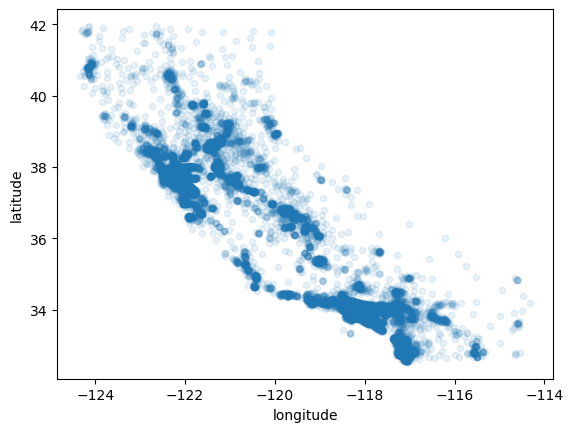

In [19]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

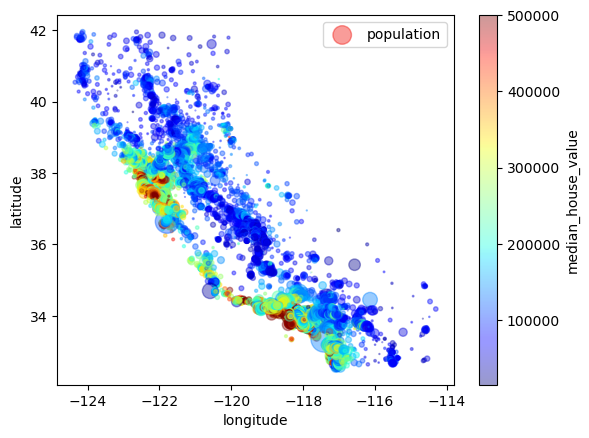

In [20]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

# Now make and understand the co-relations

ou can easily compute the standard correlation
coefcient (also called Pearson’s r) between every pair of attributes using the corr()
method

##Correlation Coefficient (Pearson's r): The correlation coefficient ranges from -1 to 1.

A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well.
A value close to -1 indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease.
A value close to 0 indicates no linear correlation between the variables.

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()
numeric_df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
# Handle non-numeric values (e.g., encode categorical labels)
# For demonstration purposes, let's assume encoding the categories into numerical values
df['ocean_proximity'] = df['ocean_proximity'].astype('category').cat.codes

# Convert the column to float
df['ocean_proximity'] = df['ocean_proximity'].astype(float)


In [24]:
    corr_matrics = df.corr()
    df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000


In [25]:

corr_with_target = corr_matrix['median_house_value'].sort_values(ascending=False)
corr_with_target

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

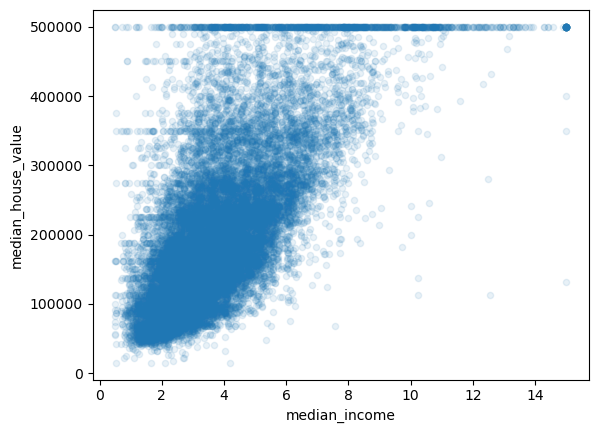

In [26]:
df.plot(kind="scatter", x='median_income', y='median_house_value', alpha=0.1)

# Now create new attributes for better understanding of inssights


In [27]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


#Preparing data for machine learning algorithms
Via data cleaning,feature engineering and feature selection, final data check

In [34]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

As we can see the total bedrooms has some null values
how can we fill those null values- via dropna, fillna

In [41]:
# Calculate median
median_value = df['total_bedrooms'].median()



#now how we can handle missing values in a data set using mean,median and mode
#Via Imputer:-Imputer class in Scikit-Learn is used to handle missing values in datasets
imputer = SimpleImputer(strategy='median/mean')
After creating Imputer we have to fit it to drainning data using fit() method


In [42]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')


In [44]:
#Since the median can only be computed on numeric attributes w/u
df_num = df.drop("ocean_proximity", axis=1)


In [47]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [48]:
imputer.statistics_


array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [50]:
df_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [51]:
#As you can see it has created the values now by using this trained imputer 
#transform the training set by replacing missing values by the learned medians
x = imputer.transform(df_num)

In [63]:
median_value = df['total_bedrooms'].median()
median_value_two = df['bedrooms_per_room'].median()
df['total_bedrooms'].fillna(median_value, inplace=True)
df['bedrooms_per_room'].fillna(median_value, inplace=True)

In [64]:
df.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

#Now lets handle text and categorical attributes
Since ocean_proximity is text attribute ae cannot compute its median
and most ml algo pefer working with numbers


In [68]:
#Scikit-Learn provides a transformer for this task called LabelEncoder:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = df["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded


array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [72]:
df['ocean_proximity'].unique()

array([3., 0., 1., 4., 2.])

In [74]:
print(encoder.classes_)

[0. 1. 2. 3. 4.]


In [75]:
#'<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']

Now what is the issue with this numerical encoding
The ml algo might think category 4 being more similar to 3 than to 0 which is false

So to address this issue we have one-hot encoding:-One-hot encoding addresses this issue by creating binary attributes for each category. Each category is represented by a single attribute (column), where the presence of the category is indicated by a value of 1, and the absence is indicated by a value of 0. This ensures that no inherent order or relationship is assumed between categories.

#Example:- with five categories: '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', and 'NEAR OCEAN
xample:

'<1H OCEAN' could be represented by [1, 0, 0, 0, 0]
'INLAND' could be represented by [0, 1, 0, 0, 0]
'ISLAND' could be represented by [0, 0, 1, 0, 0]
'NEAR BAY' could be represented by [0, 0, 0, 1, 0]
'NEAR OCEAN' could be represented by [0, 0, 0, 0, 1]


In [79]:
>>> from sklearn.preprocessing import OneHotEncoder
>>> encoder = OneHotEncoder()
>>> housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
>>> housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [81]:
df.to_csv('hosuingprice.csv')